In [1]:
import numpy as np
import pickle
import os
import math
import matplotlib.pyplot as plt
import math
import numpy as np
import sys
sys.path
from scipy import stats
sys.path.append('../models')
sys.path.append('../simulation')
import TS_personal_params_pooled as pp
import TS_global_params_pooled as gtp
%matplotlib inline


In [2]:
##metrics 
#look at reduction in error in first week, difference in regret from first decision to 5*7th decision
#35- 0th decision time
##look at regret in the first 100 decision times
plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

In [3]:
def get_results(results_path,pop_size,update_time,case,phrase,ophrase):
    
    
    files = os.listdir('{}{}'.format(results_path,case))
    
    steps = []

    #check population and pop_size,update_time
    files = [f for f in files if '.DS' not in f and pop_size in f and phrase in f and ophrase not in f and 'update_days_{}'.format(update_time) in f  and '2015' not in f    ]
    #files = files[:50]
    #print(len(files))
    #print(files)
    seen = 0 
    regrets = {}
    actions = {}
    mus = {}
    for ff in files:
        #sim = int(ff.split('sim_')[1].strip('_continuous_pretreatment_base_coef_scale_hybrid.pkl'))
        #try:
        with open('{}{}/{}'.format(results_path,case,ff),'rb') as f:
            d = pickle.load(f)
            #return d
            #print(d.keys())
            if len(d)>0:
            #if int(sim)<60:
                #print(len([k['steps'] for k in d['history'].values() if k['avail'] and k['decision_time']]))
                steps = steps+[k['steps'] for k in d['history'].values() if k['avail'] and k['decision_time']]
                for k,v in d['actions'].items():
                    if k not in actions:
                        actions[k]=[]
                    actions[k].extend(v)
                for k,v in d['regrets'].items():
                    if k not in regrets:
                        regrets[k]=[]
                    regrets[k].extend(v)
            seen = seen+1
           # print(ff)
    print(seen)
    return {'steps':steps,'regrets':regrets,'actions':actions}

In [4]:
def get_to_plot_actions(actions):
    
    skeys = sorted(actions.keys())
    to_plot = []
    for k in skeys:
        to_plot.append(sum(actions[k])/len(actions[k]))
    return to_plot
def get_to_plot_regrets(actions):
    
    skeys = sorted(actions.keys())
    to_plot = []
    for k in skeys:
        to_plot.append(np.array(actions[k]).mean())
    return to_plot

In [5]:
def get_decision_times(d,title,save_title,save=False,i=None,ax=None):
    
    x =get_to_plot_actions(d['actions'])
   
    to_plotr =  get_to_plot_regrets(d['regrets'])
    return x,to_plotr,[]

In [6]:
def get_decision_times_sims(d,title,save_title,save=False,i=None,ax=None):
    actions = {}
    regrets ={}
    steps = []
    for sim,sims in d['actions'].items():
        for k,v in sims.items():
            if k not in actions:
                actions[k]=[]
            actions[k].extend(v)
    for sim,sims in d['regrets'].items():
        for k,v in sims.items():
            if k not in regrets:
                regrets[k]=[]
            regrets[k].extend(v)
   # for sim,sims in d['steps'].items():
        
           
             
        #steps[k].extend(sims)
 
    return get_to_plot_actions(actions),get_to_plot_regrets(regrets),steps
#,get_to_plot_regrets(steps)

In [7]:
def get_all(results_path,pop,update,phrase,ophrase):
    to_return = {}
    cases = ['case_one','case_two','case_three']
   
    for i in range(len(cases)):
        case = cases[i]
        d = get_results(results_path,str(pop),update,cases[i],phrase,ophrase)
        
        act,regret,steps = get_decision_times(d,case,case,save=False,i=i,ax=None)
        to_return[case]={'actions':act,'regrets':regret,'steps':steps}
    return to_return

In [18]:
def get_all_d(dic):
    to_return = {}
    cases = ['case_one','case_two','case_three']
   
    for i in range(len(cases)):
        case = cases[i]
        d = dic[case]
        act,regret,steps  = get_decision_times_sims(d,case,case,save=False,i=i,ax=None)
        to_return[case]={'actions':act,'regrets':regret,'steps':steps}
    return to_return

In [8]:
with open('../../Downloads/results_pfour_625.pkl','rb') as f:
    pooled = pickle.load(f)

In [9]:
def get_weekly_averages(points):
    to_return = []
    sems = []
    for i in range(0,len(points)-5,35):
        temp = points[i:i+35]
        to_return.append(np.array(temp).mean())
        #print(temp)
        sems.append(stats.sem(temp))
    return to_return,sems

In [10]:
#pooled['case_one'][1].keys()

In [19]:
t= get_all_d(pooled)


In [12]:
def plot_all_special_actions(batch,personalized,pooled):
    
    fig, ax = plt.subplots(nrows=1, ncols=3)
    fig.tight_layout( w_pad=2.5, h_pad=1.0)

    #'case_one','case_two',
    cases = ['case_one','case_two','case_three']
    plt.setp(ax[:],  yticks = np.arange(.4, .85, step=0.10),ylim = [.4,.85])
    #plt.setp(ax[1,:],  yticks = np.arange(0, .5, step=0.05),ylim = [0,.5])
    #'Homogenous','Bi-modal',
    
    titles = ['Homogenous','Bi-modal','Smooth']
    offset = 5
    for i in range(len(cases)):
            if i==0:
                #plt.setp(ax[0],  yticks = np.arange(0, .15, step=0.05),ylim = [0,.15])
                ax[i].set_ylabel("Average Weekly Percent Correct Action " r"$\rho^*$")
                #("Average Weekly Percent Correct Action r"$\rho$!"")
            if i==1:
                
                #plt.setp(ax[1],  yticks = np.arange(0, .3, step=0.05),ylim = [0,.3])
                ax[i].set_xlabel('Week of study')
            #if i==2:
                #plt.setp(ax[2],  yticks = np.arange(0, .3, step=0.05),ylim = [0,.3])
            ax[i].set_title(titles[i])
            
            b =get_weekly_averages(batch[cases[i]]['actions'])
            #labels = ['{}'.format(i) for i in range(0,len(b),15) ]
            #print([i for i in range(len(b[0]))])
            ax[i].errorbar([i for i in range(len(b[0]))],b[0],yerr=b[1],fmt='o-',label='Complete')
            
            #print(len([b[j] for j in range(0,len(b),25)]))
          
            p =get_weekly_averages(personalized[cases[i]]['actions'])
            ax[i].errorbar([i for i in range(len(p[0]))],p[0],yerr=p[1],fmt='+-',label='Person-specific')
         
            po =get_weekly_averages(pooled[cases[i]]['actions'])
            ax[i].errorbar([i for i in range(len(po[0]))],po[0],yerr=po[1],label='IntelligentPooling')
            #xx=[i for i in range(int(len([b[j] for j in range(0,len(b),offset)])/4),len([b[j] for j in range(0,len(b),offset)]),int(len([b[j] for j in range(0,len(b),offset)])/4))]
            #print(xx)
            #print([j for j in range(0,len(b),offset)])
            xx = [i for i in range(0,12,2)]
            labels = ['{}'.format(i) for i in range(0,12,2) ]
            #labels = ['{}'.format(i*offset) for i in xx ]
            
            #print(labels)
            #print(xx)
            #print(len(labels))
            #print(len(xx))
            ax[i].set_xticks(xx)
            ax[i].set_xticklabels(labels)
    plt.legend(bbox_to_anchor=(1.15, .5)) 
    #plt.savefig('all_12weeks_rho',dpi=300, bbox_inches='tight')

In [13]:
def plot_all_special_actions_ne(batch,personalized,pooled):
    
    fig, ax = plt.subplots(nrows=1, ncols=3)
    fig.tight_layout( w_pad=2.5, h_pad=1.0)

    #'case_one','case_two',
    cases = ['case_one','case_two','case_three']
    plt.setp(ax[:],  yticks = np.arange(.4, .85, step=0.10),ylim = [.4,.85])
    #plt.setp(ax[1,:],  yticks = np.arange(0, .5, step=0.05),ylim = [0,.5])
    #'Homogenous','Bi-modal',
    
    titles = ['Homogenous','Bi-modal','Smooth']
    offset = 5
    for i in range(len(cases)):
            if i==0:
                #plt.setp(ax[0],  yticks = np.arange(0, .15, step=0.05),ylim = [0,.15])
                ax[i].set_ylabel("Average Weekly Percent Correct Action " r"$\rho^*$")
                #("Average Weekly Percent Correct Action r"$\rho$!"")
            if i==1:
                
                #plt.setp(ax[1],  yticks = np.arange(0, .3, step=0.05),ylim = [0,.3])
                ax[i].set_xlabel('Week of study')
            #if i==2:
                #plt.setp(ax[2],  yticks = np.arange(0, .3, step=0.05),ylim = [0,.3])
            ax[i].set_title(titles[i])
            
            b =get_weekly_averages(batch[cases[i]]['actions'])
            #labels = ['{}'.format(i) for i in range(0,len(b),15) ]
            #print([i for i in range(len(b[0]))])
            ax[i].plot(b[0],'o-',label='Complete-pooling')
            
            #print(len([b[j] for j in range(0,len(b),25)]))
          
            p =get_weekly_averages(personalized[cases[i]]['actions'])
            ax[i].plot(p[0],'+-',label='Person-specific')
         
            po =get_weekly_averages(pooled[cases[i]]['actions'])
            ax[i].plot(po[0],label='IntelligentPooling')
            #xx=[i for i in range(int(len([b[j] for j in range(0,len(b),offset)])/4),len([b[j] for j in range(0,len(b),offset)]),int(len([b[j] for j in range(0,len(b),offset)])/4))]
            #print(xx)
            #print([j for j in range(0,len(b),offset)])
            xx = [i for i in range(0,12,2)]
            labels = ['{}'.format(i) for i in range(0,12,2) ]
            #labels = ['{}'.format(i*offset) for i in xx ]
            
            #print(labels)
            #print(xx)
            #print(len(labels))
            #print(len(xx))
            ax[i].set_xticks(xx)
            ax[i].set_xticklabels(labels)
    plt.legend(bbox_to_anchor=(1.15, .5)) 
    #plt.savefig('all_12weeks_65.pdf',dpi=1200, bbox_inches='tight')

In [14]:
def plot_all_special_regret(batch,personalized,pooled):
    
    fig, ax = plt.subplots(nrows=1, ncols=3)
    fig.tight_layout( w_pad=2.5, h_pad=1.0)

    #'case_one','case_two',
    cases = ['case_one','case_two','case_three']
    plt.setp(ax[:],  yticks = np.arange(.4, .85, step=0.10),ylim = [.4,.85])
    #plt.setp(ax[1,:],  yticks = np.arange(0, .5, step=0.05),ylim = [0,.5])
    #'Homogenous','Bi-modal',
    
    titles = ['Homogenous','Bi-modal','Smooth']
    offset = 5
    for i in range(len(cases)):
            if i==0:
                plt.setp(ax[0],  yticks = np.arange(0.00, .17, step=0.05),ylim = [0.00,.17])
                ax[i].set_ylabel('Average weekly correct regret')
            if i==1:
                
                plt.setp(ax[1],  yticks = np.arange(0.00, .17, step=0.05),ylim = [0.00,.17])
                ax[i].set_xlabel('Decision times')
            if i==2:
                plt.setp(ax[2],  yticks = np.arange(0.05, .25, step=0.05),ylim = [0.05,.25])
            ax[i].set_title(titles[i])
            
            b =get_weekly_averages(batch[cases[i]]['regrets'])
            #print(b)
            #labels = ['{}'.format(i) for i in range(0,len(b),15) ]
            #yerr=b[1],
            #[i for i in range(len(b[0]))],
            ax[i].plot(b[0],'o-',label='Complete-pooling')
            
            #print(len([b[j] for j in range(0,len(b),25)]))
          
            p =get_weekly_averages(personalized[cases[i]]['regrets'])
            #yerr=p[1],
            #[i for i in range(len(p[0]))]
            ax[i].plot(p[0],'+-',label='Person-specific')
         
            po =get_weekly_averages(pooled[cases[i]]['regrets'])
            #print(po)
            #yerr=po[1],
            ax[i].plot(po[0],label='IntelligentPooling')
            #xx=[i for i in range(int(len([b[j] for j in range(0,len(b),offset)])/4),len([b[j] for j in range(0,len(b),offset)]),int(len([b[j] for j in range(0,len(b),offset)])/4))]
            #print(xx)
            #print([j for j in range(0,len(b),offset)])
            xx = [i for i in range(0,14,2)]
            labels = ['{}'.format(i) for i in range(0,14,2) ]
            #labels = ['{}'.format(i*offset) for i in xx ]
            
            #print(labels)
            #print(xx)
            #print(len(labels))
            #print(len(xx))
            ax[i].set_xticks(xx)
            ax[i].set_xticklabels(labels)
    plt.legend(bbox_to_anchor=(1.15, .5)) 
    #plt.savefig('all_12weeks_regret_65.pdf',dpi=300, bbox_inches='tight',)

In [15]:
fb = get_all('../../Downloads/pooling_results/batch/','32',7,'tdpl4r_save_more.','coef')

50
50
50


In [16]:
fp = get_all('../../Downloads/pooling_results/personalized/','32',7,'tdpl4r_save_more.','coef')

50
50
50


In [23]:
plt.rcParams.update({'font.size': 16})

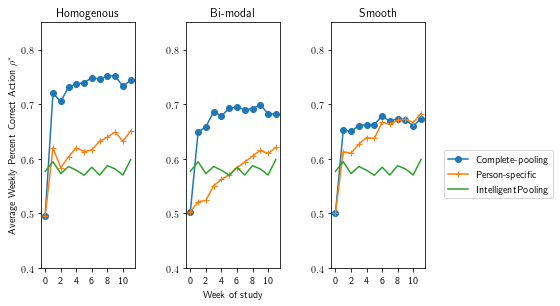

In [20]:
plot_all_special_actions_ne(fb,fp,t)

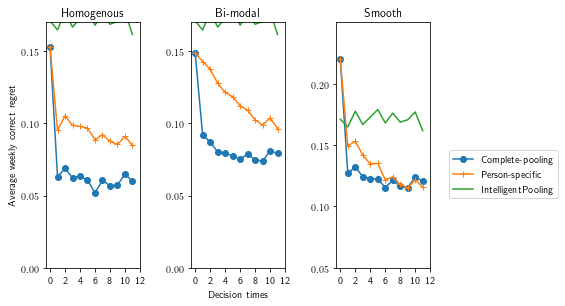

In [21]:
plot_all_special_regret(fb,fp,t)

In [167]:
len(pooled['case_one']['steps'])

543608

In [168]:
50*5*7*12

21000

<ErrorbarContainer object of 3 artists>

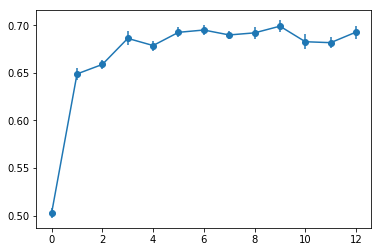

In [93]:
plt.errorbar(x=[i for i in range(len(wfb[0]))],y=wfb[0],yerr=wfb[1],fmt='o-',label='Complete')

In [71]:
case = 'case_two'

In [105]:
wfb = get_weekly_averages(fb[case]['actions'])
#wf = get_weekly_averages(fp[case])
#wp = get_weekly_averages(t[case])

[0.4683346364347146, 0.48985959438377535, 0.508209538702111, 0.5059288537549407, 0.5003897116134061, 0.4938461538461538, 0.5201581027667984, 0.4936, 0.4895498392282958, 0.4724842767295597, 0.5066147859922179, 0.5221169036334913, 0.49140625, 0.5104408352668214, 0.4833860759493671, 0.5197215777262181, 0.5032, 0.5228706624605678, 0.49206349206349204, 0.5393518518518519, 0.5407114624505929, 0.5235811350919265, 0.48093385214007783, 0.5545171339563862, 0.49923195084485406, 0.5295043273013376, 0.5101404056162246, 0.5453149001536098, 0.5796425796425796, 0.46017014694508895, 0.5019394879751745, 0.49645390070921985, 0.4792806880375293, 0.39257503949447076, 0.4765258215962441]
[0.6703210649960846, 0.638801261829653, 0.619233776387803, 0.6429136975455265, 0.6529051987767585, 0.6051805337519623, 0.6182096403978576, 0.6270523846755277, 0.6559561128526645, 0.6513833992094862, 0.6090342679127726, 0.6071987480438185, 0.6558028616852146, 0.6474308300395257, 0.6552262090483619, 0.6408450704225352, 0.6643

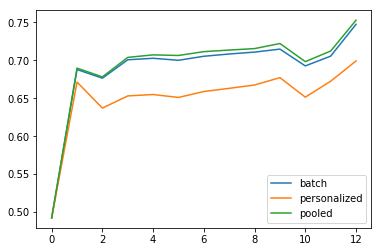

In [179]:
plt.plot(wfb,label='batch')
plt.plot(wf,label='personalized')
plt.plot(wp,label='pooled')
plt.legend()

In [180]:
case = 'case_two'

In [181]:
wfbr = get_weekly_averages(fb[case][1])
wfr = get_weekly_averages(fp[case][1])
wpr = get_weekly_averages(t[case][1])

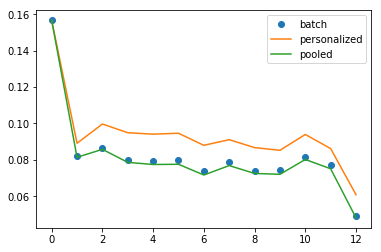

In [182]:
plt.plot(wfbr,'o',label='batch')
plt.plot(wfr,label='personalized')
plt.plot(wpr,label='pooled')
plt.legend()

In [133]:
for k,v in test.items():
    print(k)
    print(np.array(v).mean())

2
0.4802317784922969
1
0.5243529361544701


In [134]:
test = get_interventions('../../Downloads/pooling_results/personalized/','32',7,'case_two','_skewed_three','coef')

In [135]:
for k,v in test.items():
    print(k)
    print(np.array(v).mean())

2
0.5073564146716852
1
0.6984589991320309


In [138]:
save_all('../../Downloads/pooling_results/batch/','32',7,'_skewed_three','coef','batch_skewed')

50
50
50


100
0.7127780384270297
100
0.6207694632613399
100
0.688776810783113


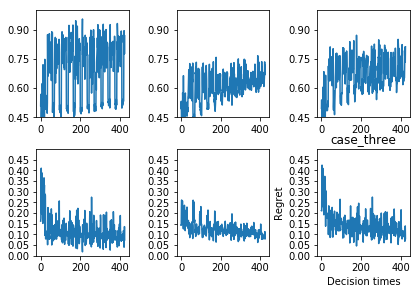

In [23]:
plot_all('../../Downloads/pooling_results/personalized/','32',7,'515_longnew','coef')

100
0.8018110319355873
100
0.6789277780374814
100
0.6945647119303753


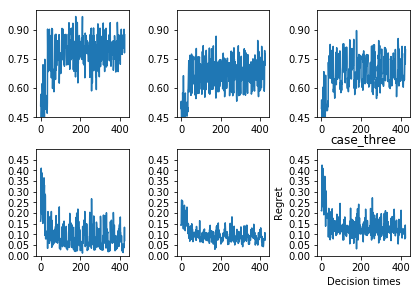

In [22]:
plot_all('../../Downloads/pooling_results/batch/','32',7,'515_longnew','coef')

50
0.732929064687011
50
0.6057083820222462
50
0.6660065688118749


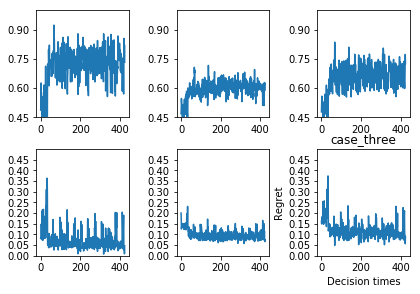

In [98]:
#0.6335868265518692
plot_all('../../Downloads/pooling_results/batch/','32',7,'_4_24pl','coef')

100
0.696950394504223
100
0.6337271160683071
100
0.6784991951569043


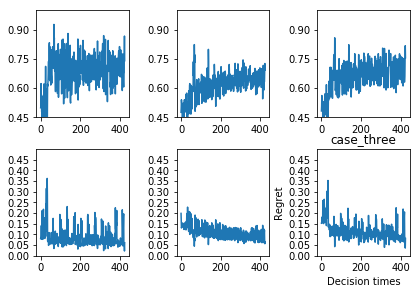

In [14]:
plot_all('../../Downloads/pooling_results/personalized/','32',7,'515','coef')

50
0.6963424735064452
50
0.6333998585619742
50
0.7012133993424519


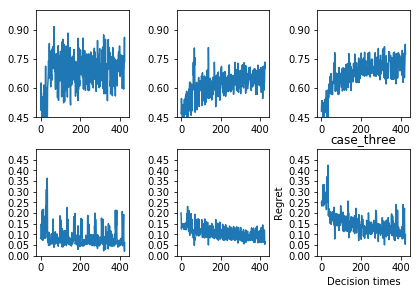

In [97]:
plot_all('../../Downloads/pooling_results/personalized/','32',7,'_skewed_three','coef')


50
0.6965837433205749
50
0.631863205374986
50
0.6749407231325585


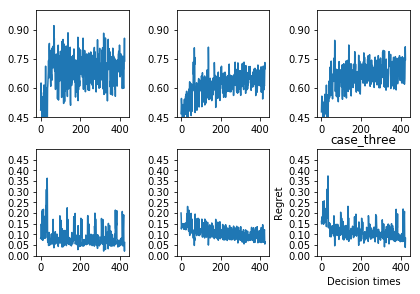

In [90]:
plot_all('../../Downloads/pooling_results/personalized/','32',7,'_4_24pl','coef')


In [ ]:
#between dowpreloc and tpl, these both seem relatively promising 
#- test dowpreloc with more time

In [ ]:


#tpl
50
0.7472792523252064
50
0.6165454737643887
50
0.6686615053522023

In [ ]:
#dow pre loc
#PERSONALIZED
0.6681673658031947
0.6082975236151614
0.6490472608314646

#tpl
50
0.6668255923293641
50
0.5918083714886276
50
0.641138912248373

In [ ]:
#dow pre loc
#PERSONALIZED
0.6681673658031947
0.6082975236151614
0.6490472608314646

0
nan
0
nan
16
0.6693968350643922


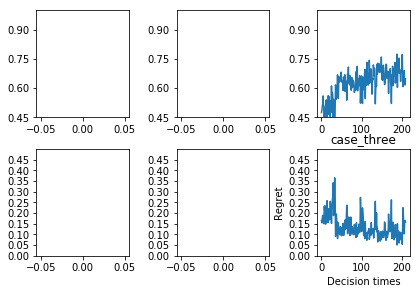

In [364]:
plot_all('../../Downloads/results_4_18/pooling/','32',7,'difstarts','coef')


1.3224999999999998

51
0.5731156020381111
51
0.6721511923910594
51
0.6936533509668307


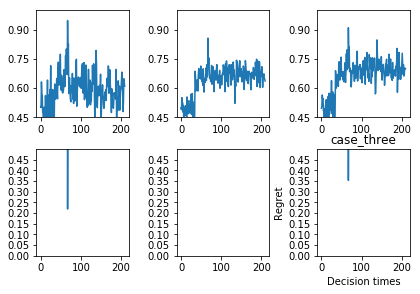

In [217]:
plot_all('../../Downloads/results_4_16/results/','32',7,'sigmauagain')

In [208]:
import shutil

In [214]:
case_one = [f for f in os.listdir('../../Downloads/results_4_16/results') if '.pkl' in f and 'case_three' in f]

In [215]:
for f in case_one:
    shutil.copyfile('../../Downloads/results_4_16/results/{}'.format(f),'../../Downloads/results_4_16/results/case_three/{}'.format(f))

In [275]:
fn ='population_size_32_update_days_7_short_static_sim_0_preloc_4_18difstarts.pkl'

In [276]:
with open('{}{}'.format('../../Downloads/results_4_18/pooling/case_three/',fn),'rb') as f:
    test = pickle.load(f)




In [277]:
test['pprams'].mus2

{0: array([ 0.00313998,  0.50398227, -0.29648448]),
 1: array([-0.3169843 ,  0.50398227, -0.29648448]),
 2: array([-0.18103502,  0.50398227, -0.29648448]),
 3: array([-0.87684544,  0.50398227, -0.29648448]),
 4: array([ 1.08445036,  0.50398227, -0.29648448]),
 5: array([-0.19756194,  0.50398227, -0.29648448]),
 6: array([ 1.19607202,  0.50398227, -0.29648448]),
 7: array([ 0.20930111,  0.50398227, -0.29648448]),
 8: array([-1.04088976,  0.50398227, -0.29648448]),
 9: array([-1.63917723,  0.50398227, -0.29648448]),
 10: array([ 0.22251186,  0.50398227, -0.29648448]),
 11: array([ 1.01361213,  0.50398227, -0.29648448]),
 12: array([-0.25771278,  0.50398227, -0.29648448]),
 13: array([ 0.67903713,  0.50398227, -0.29648448]),
 14: array([ 0.31943812,  0.50398227, -0.29648448]),
 15: array([-0.96416954,  0.50398227, -0.29648448]),
 16: array([ 3.69890931,  0.50398227, -0.29648448]),
 17: array([-1.49370038,  0.50398227, -0.29648448]),
 18: array([ 0.6253796 ,  0.50398227, -0.29648448]),
 19